# Plotting scripts

 ## Compare output from Deadtime Correction Technique (DCT) and Muller Correction

In [44]:
import os
import sys

cwd = os.getcwd()
dirLib = cwd + r'/library'
if dirLib not in sys.path:
    sys.path.append(dirLib)
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path

from load_ARSENL_data import set_binwidth

In [170]:
home = str(Path.home())
pkl_dir = home + r'\OneDrive - UCB-O365\ARSENL\Experiments\Cloud Measurements\Sims\evaluation_loss\fit_figures'
muller_picklename = r'\muller_out_simnum0_downsamp50_shots1.99E+02.pkl'
dct_picklename = r'\DCT_out_dtimeTrue_simnum0_order11-23_shots1.99E+02.pkl'

In [171]:
c = 2.99792458e8  # [m/s] Speed of light

In [172]:
# First load Muller correction and relevant variale

# Unpickle the data to DataFrame object
infile = open('{}/{}'.format(pkl_dir, muller_picklename), 'rb')
df_muller = pickle.load(infile)
infile.close()

infile = open('{}/{}'.format(pkl_dir, dct_picklename), 'rb')
df_dct = pickle.load(infile)
infile.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Grant\\OneDrive - UCB-O365\\ARSENL\\Experiments\\Cloud Measurements\\Sims\\evaluation_loss\\fit_figures/\\DCT_out_dtimeTrue_simnum0_order11-23_shots1.99E+02.pkl'

In [169]:
dt = df_muller[0]
downsamp = df_muller[1]
t_min, t_max = df_muller[2], df_muller[3]
flight_time_LG = df_muller[4]
flight_time_HG = df_muller[5]
n_shots = df_muller[6]
deadtime = df_muller[7]
T_BS_LG, T_BS_HG = df_muller[8], df_muller[9]
photon_rate_arr_LG_muller = df_muller[10]
sim_num = df_muller[11]
t_fine_muller = df_muller[12]

discrete_loss = df_dct[0]
photon_rate_arr_LG_dct = df_dct[10]
t_fine_dct = df_dct[12]
fit_rate_seg = df_dct[13]
min_order = df_dct[14]

In [162]:
xlim = [975, 1050]  # [m]

Processed Resolution: 0.187 m (1.250e-09 s)


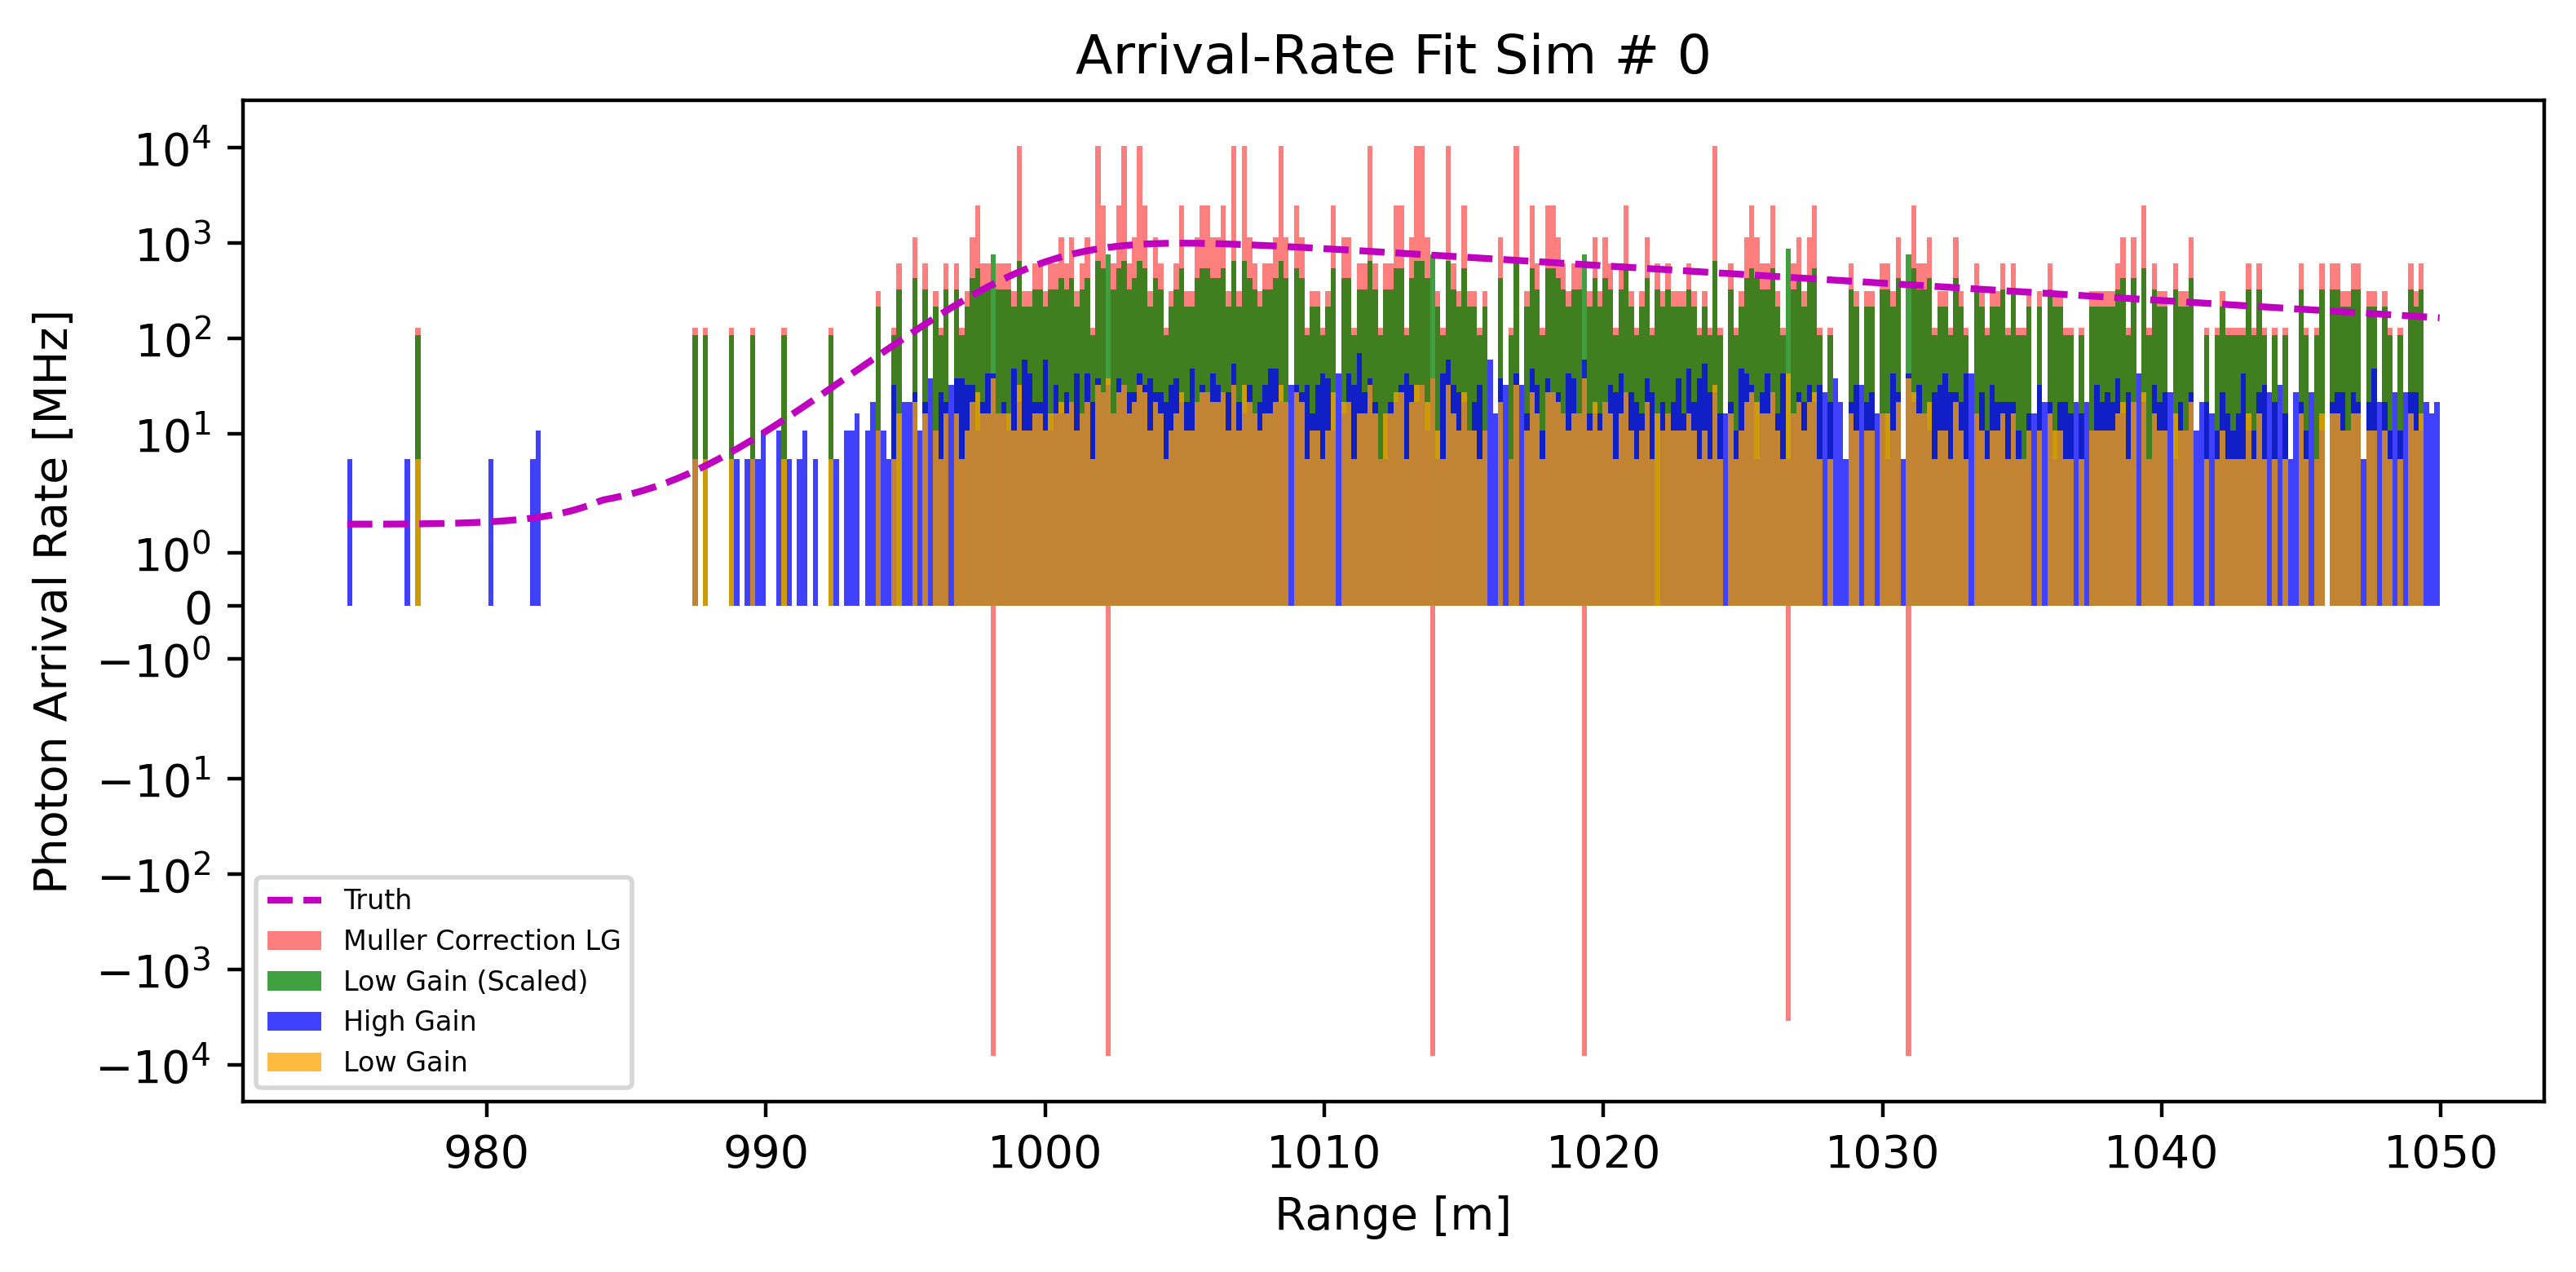

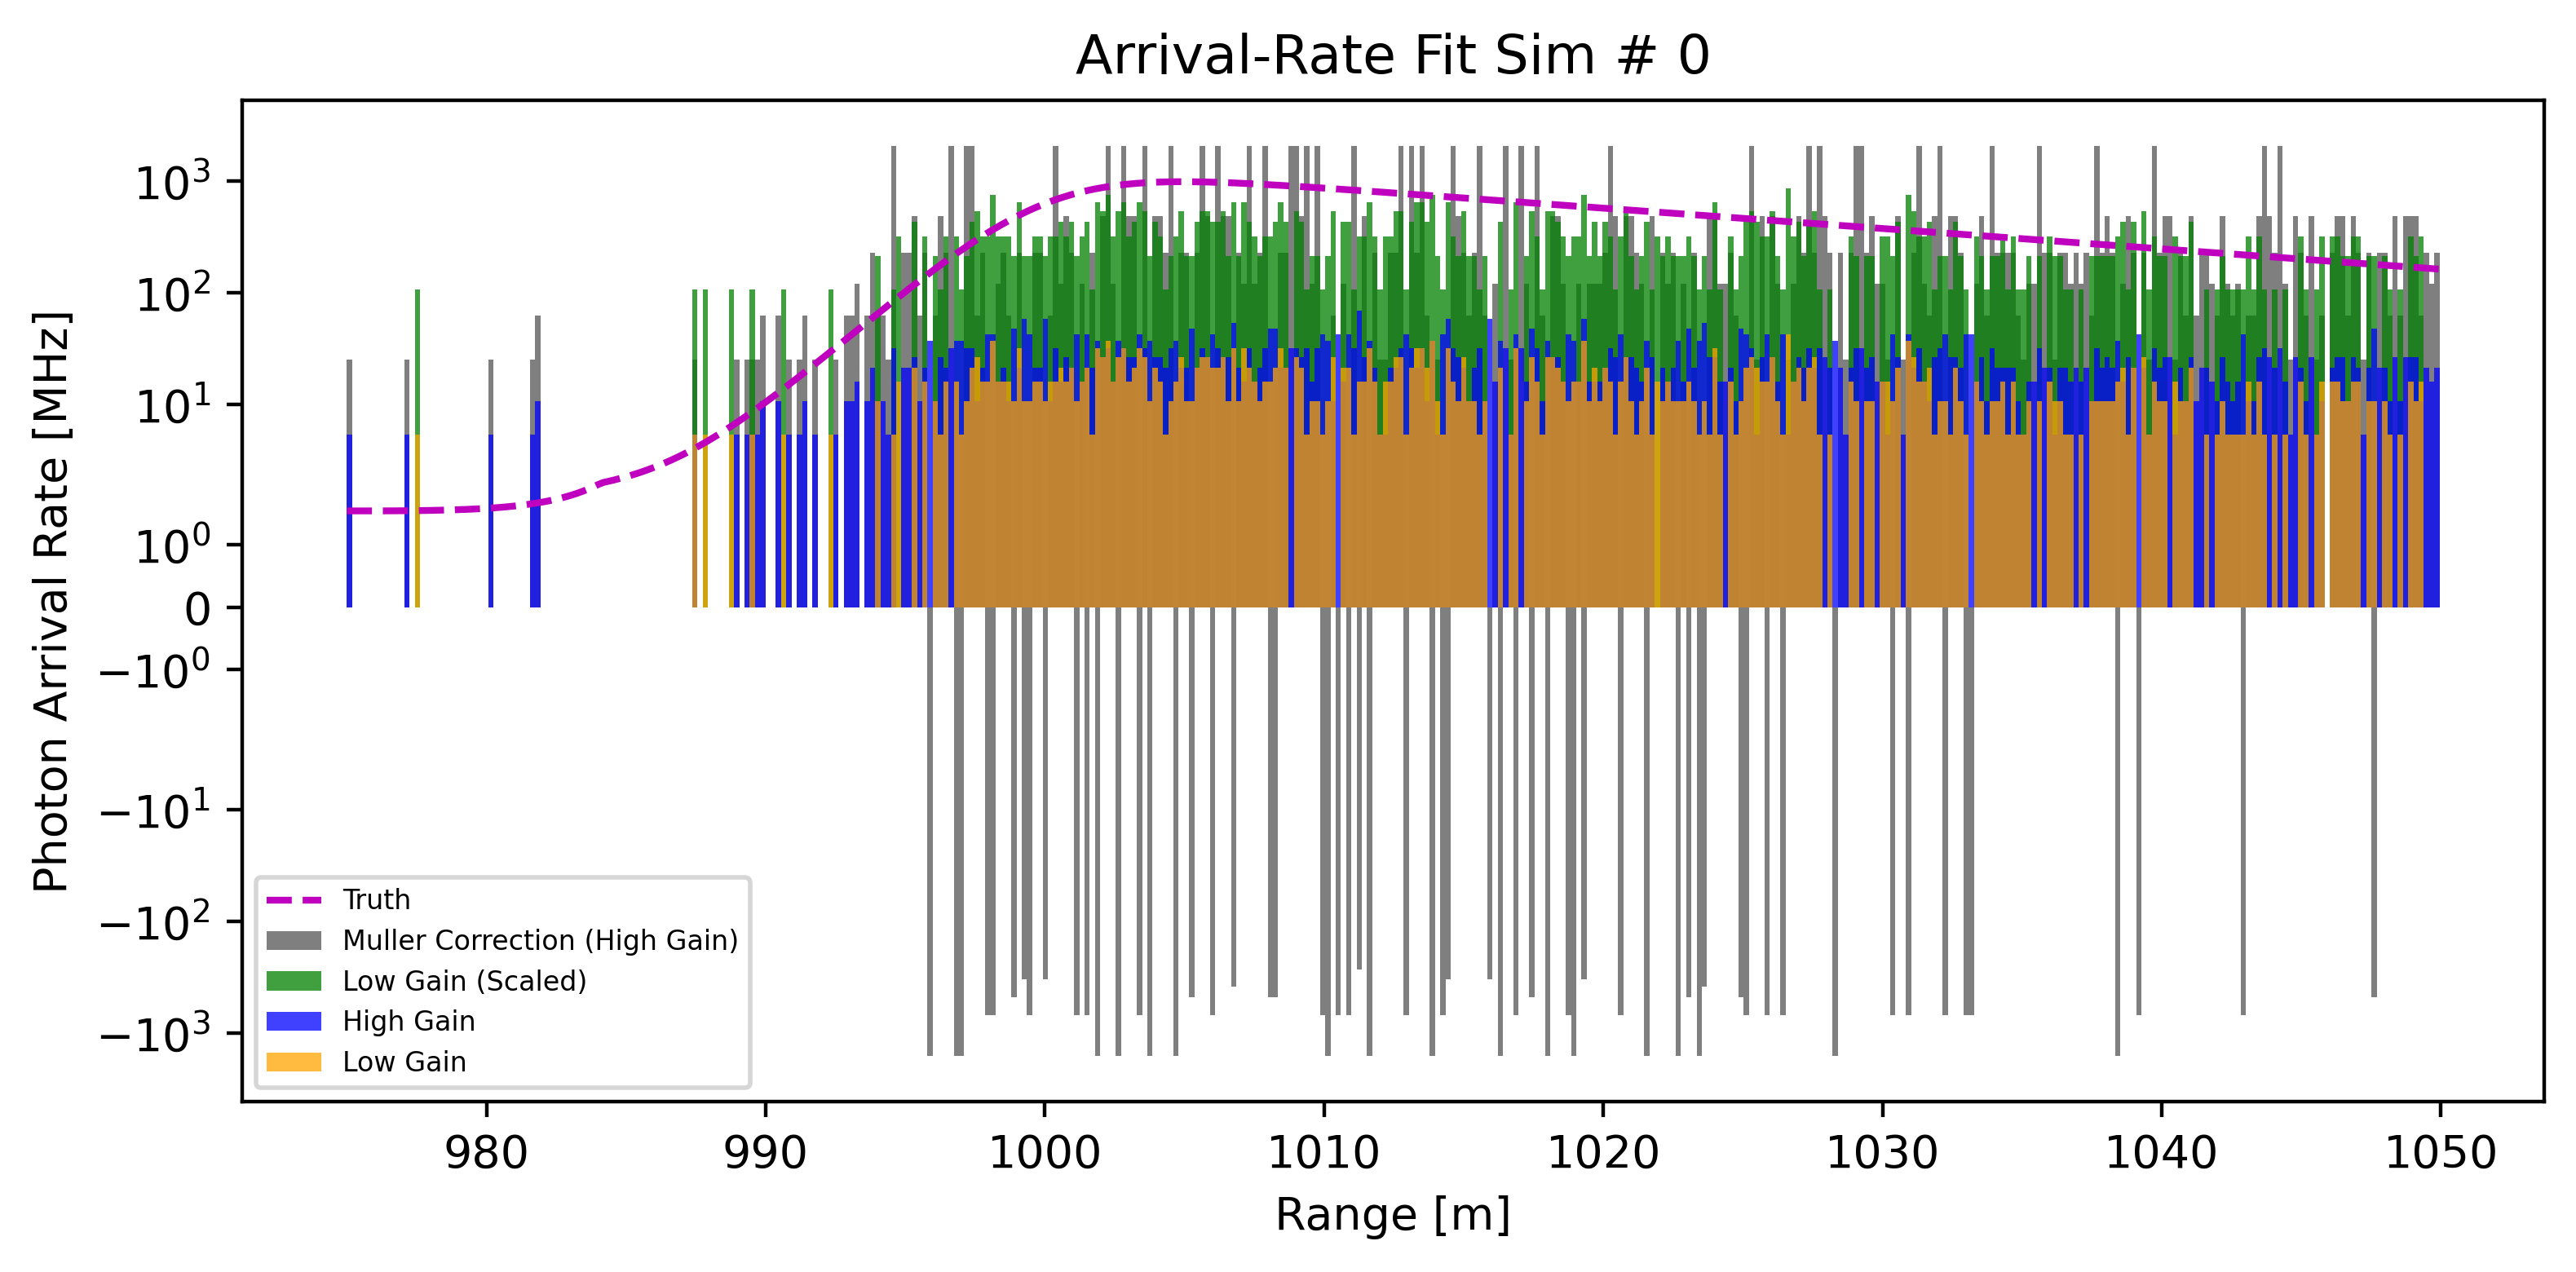

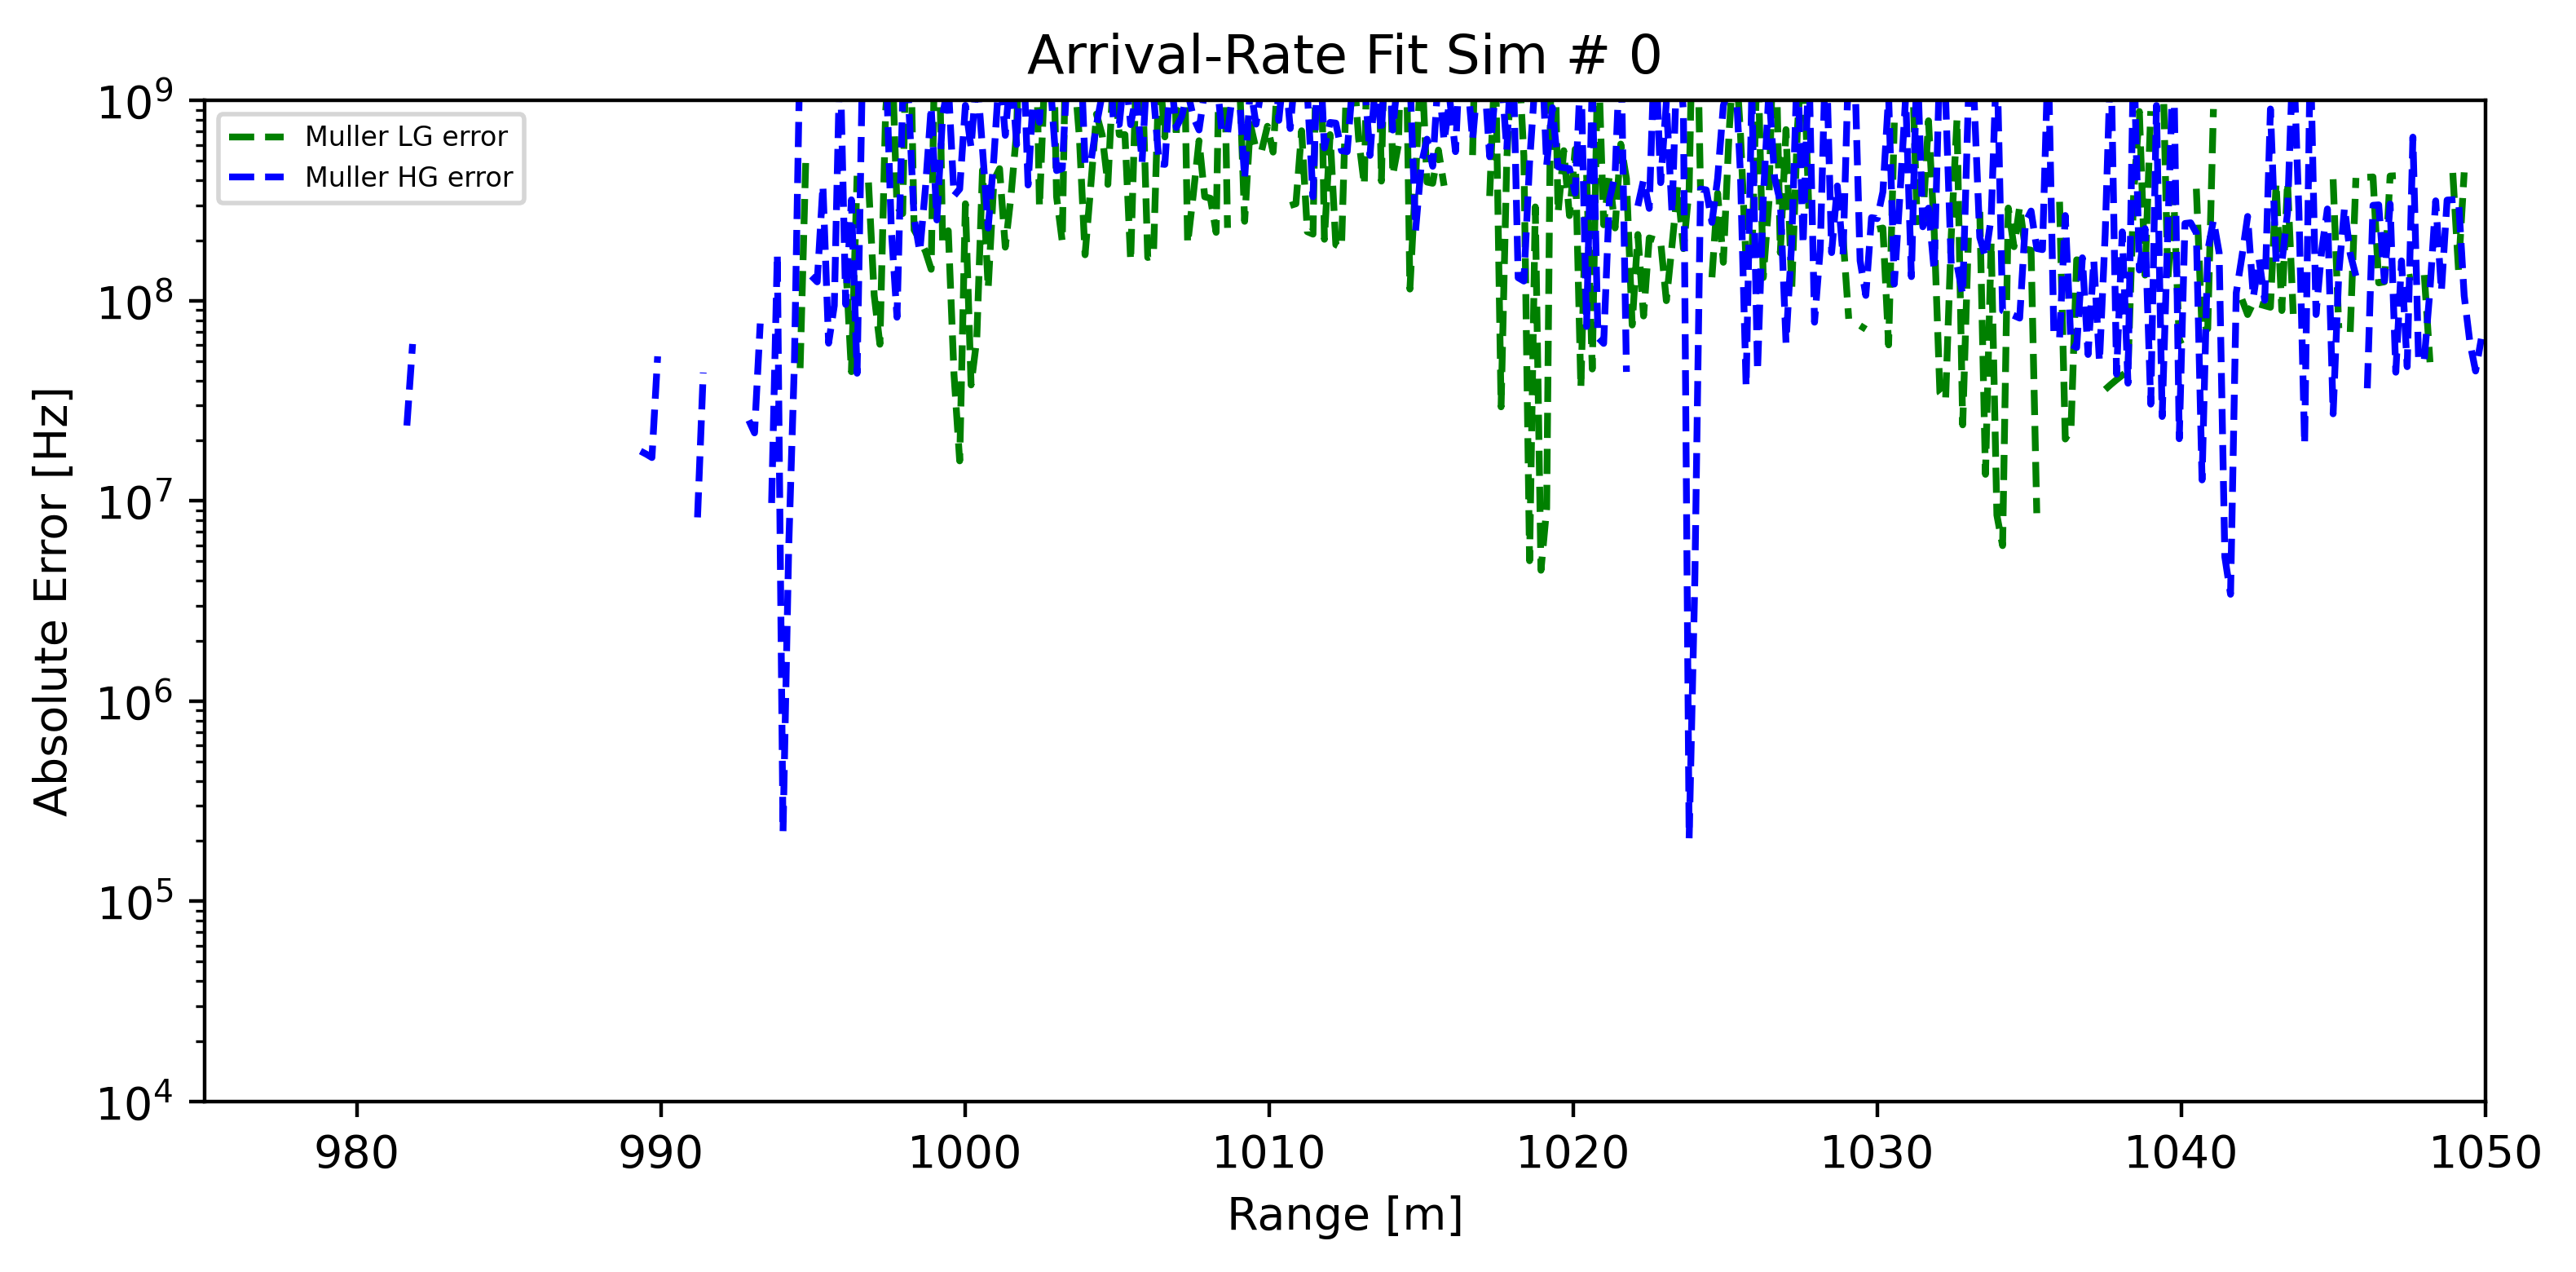

In [163]:
# Plotting histograms
res = dt * downsamp  # [s]
print('Processed Resolution: {:.3f} m ({:.3e} s)'.format(res * c / 2, res))
bin_array = set_binwidth(t_min, t_max, res)
n_LG, bins = np.histogram(flight_time_LG, bins=bin_array)
n_HG, __ = np.histogram(flight_time_HG, bins=bin_array)
binwidth = np.diff(bins)[0]
N_LG = n_LG / binwidth / n_shots  # [Hz] Scaling counts to arrival rate
N_HG = n_HG / binwidth / n_shots  # [Hz]
N_LG_muller = N_LG / (1 - N_LG*deadtime)  # [Hz] Muller correction applied directly to (unscaled) histogram
N_HG_muller = N_HG / (1 - N_HG*deadtime)  # [Hz]
N_LG_muller = N_LG_muller / T_BS_LG  # [Hz] Rescale histogram
N_HG_muller = N_HG_muller / T_BS_HG  # [Hz]
center_muller = 0.5 * (bins[:-1] + bins[1:])  # [s]
photon_rate_arr_muller = photon_rate_arr_LG_muller / T_BS_LG  # [Hz]
N_LG_muller = np.where(N_LG_muller==0, np.nan, N_LG_muller)
N_HG_muller = np.where(N_HG_muller==0, np.nan, N_HG_muller)

fig = plt.figure(figsize=(8, 4), dpi=400)
ax = fig.add_subplot(111)
ax.bar(center_muller * c / 2, N_LG_muller / 1e6, align='center', width=binwidth * c / 2, color='red', alpha=0.50, label='Muller Correction LG')
# ax.bar(center * c / 2, N_HG_muller / 1e6, align='center', width=binwidth * c / 2, color='black', alpha=0.50, label='Muller Correction (High Gain)')
ax.bar(center_muller * c / 2, N_LG / 1e6 / T_BS_LG, align='center', width=binwidth * c / 2, color='green', alpha=0.75, label='Low Gain (Scaled)')
ax.bar(center_muller * c / 2, N_HG / 1e6, align='center', width=binwidth * c / 2, color='blue', alpha=0.75, label='High Gain')
ax.bar(center_muller * c / 2, N_LG / 1e6, align='center', width=binwidth * c / 2, color='orange', alpha=0.75, label='Low Gain')
ax.plot(t_fine_muller * c / 2, photon_rate_arr_muller / 1e6, color='m', linestyle='--', label='Truth')
ax.set_title('Arrival-Rate Fit Sim # {}'.format(sim_num))
ax.set_xlabel('Range [m]')
ax.set_ylabel('Photon Arrival Rate [MHz]')
plt.yscale('symlog')
plt.legend(prop={'size': 6})
plt.tight_layout()

fig = plt.figure(figsize=(8, 4), dpi=400)
ax = fig.add_subplot(111)
ax.bar(center_muller * c / 2, N_HG_muller / 1e6, align='center', width=binwidth * c / 2, color='black', alpha=0.50, label='Muller Correction (High Gain)')
ax.bar(center_muller * c / 2, N_LG / 1e6 / T_BS_LG, align='center', width=binwidth * c / 2, color='green', alpha=0.75, label='Low Gain (Scaled)')
ax.bar(center_muller * c / 2, N_HG / 1e6, align='center', width=binwidth * c / 2, color='blue', alpha=0.75, label='High Gain')
ax.bar(center_muller * c / 2, N_LG / 1e6, align='center', width=binwidth * c / 2, color='orange', alpha=0.75, label='Low Gain')
ax.plot(t_fine_muller * c / 2, photon_rate_arr_muller / 1e6, color='m', linestyle='--', label='Truth')
ax.set_title('Arrival-Rate Fit Sim # {}'.format(sim_num))
ax.set_xlabel('Range [m]')
ax.set_ylabel('Photon Arrival Rate [MHz]')
plt.yscale('symlog')
plt.legend(prop={'size': 6})
plt.tight_layout()

# Plotting error
LG_error_muller = np.abs(photon_rate_arr_muller[:-1] - N_LG_muller)  # [Hz] Absolute error with Muller corrected histogram
HG_error_muller = np.abs(photon_rate_arr_muller[:-1] - N_HG_muller)  # [Hz] Absolute error with Muller corrected histogram

fig = plt.figure(figsize=(8, 4), dpi=400)
ax = fig.add_subplot(111)
ax.plot(center_muller * c / 2, LG_error_muller, color='green', linestyle='--', label='Muller LG error')
ax.plot(center_muller * c / 2, HG_error_muller, color='blue', linestyle='--', label='Muller HG error')
ax.set_title('Arrival-Rate Fit Sim # {}'.format(sim_num))
ax.set_xlabel('Range [m]')
ax.set_ylabel('Absolute Error [Hz]')
ax.tick_params(axis='y', which='minor')
ax.semilogy()
ax.set_ylim([1e4, 1e9])
ax.set_xlim(xlim)
plt.legend(prop={'size': 6})
plt.tight_layout()
plt.show()

Processed Resolution: 0.0037474057250000002 m (2.5e-11 s)
Figure Resolution: 0.18737028625000002 m (1.25e-09 s)


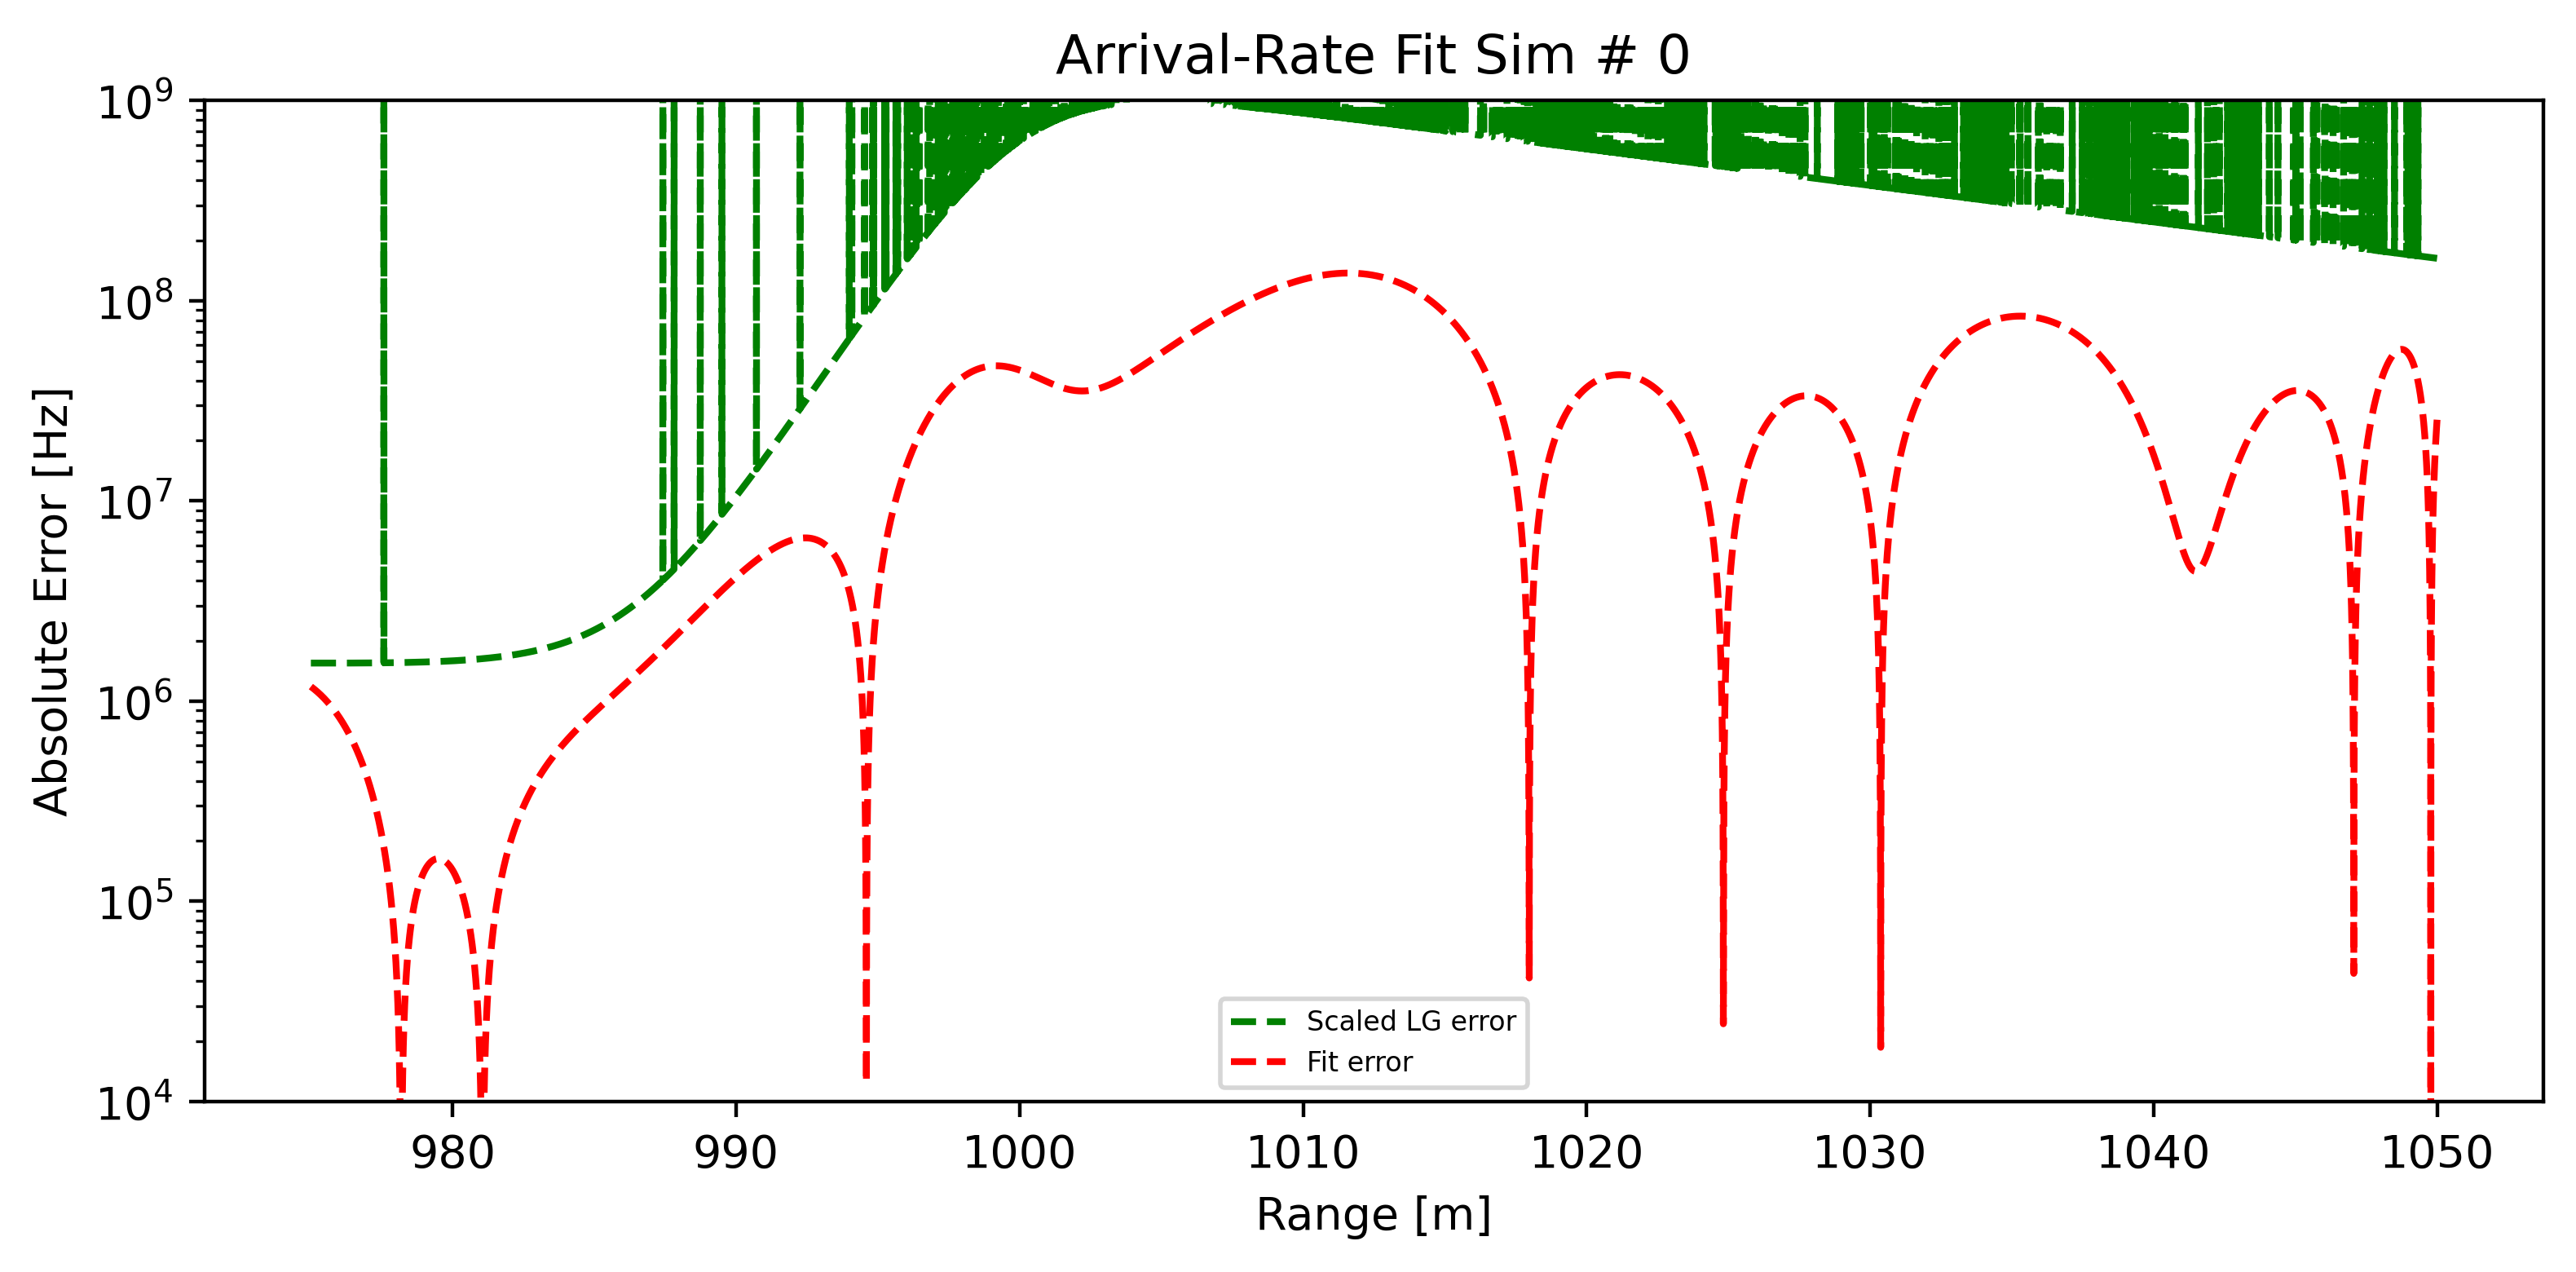

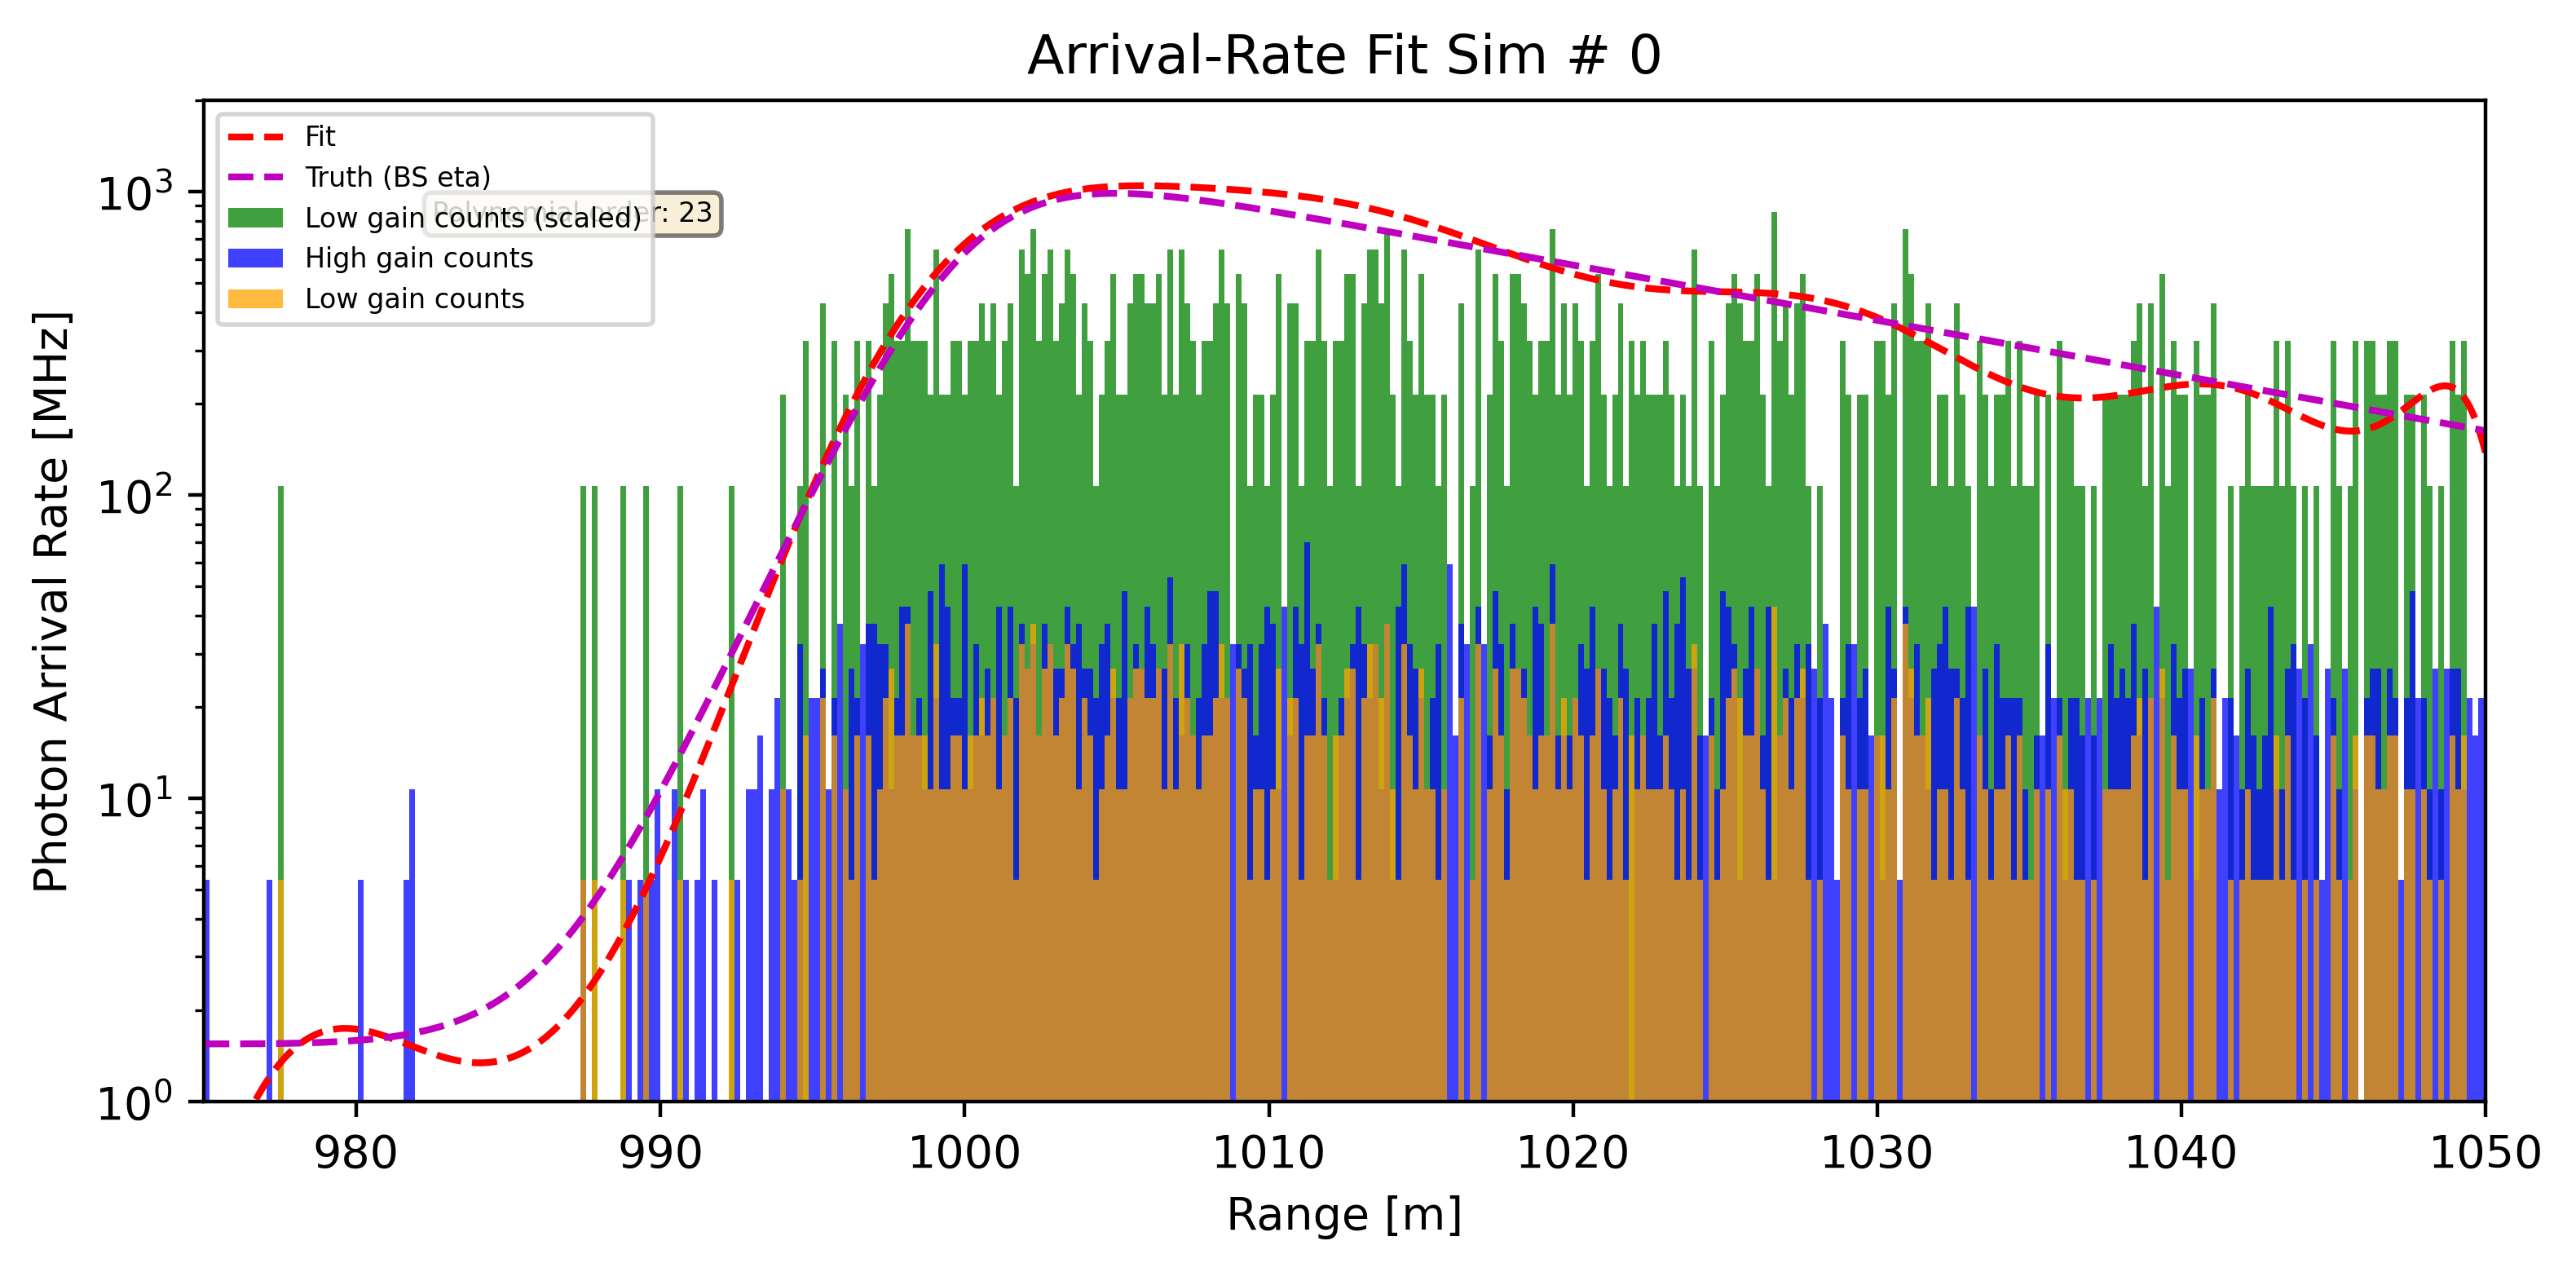

In [164]:
# Plotting error
if discrete_loss:
    res = dt * downsamp  # [s]
else:
    res = dt  # [s]
print('Processed Resolution: {} m ({} s)'.format(res * c / 2, res))
bin_array = set_binwidth(t_min, t_max+res, res)
n_LG, bins = np.histogram(flight_time_LG, bins=bin_array)
binwidth = np.diff(bins)[0]
N_LG = n_LG / binwidth / n_shots  # [Hz] Scaling counts to arrival rate
photon_rate_arr_dct = photon_rate_arr_LG_dct / T_BS_LG
LG_error = np.abs(photon_rate_arr_dct - N_LG / T_BS_LG)  # [Hz] Absolute error with scaled LG histogram

fig = plt.figure(figsize=(8, 4), dpi=400)
ax = fig.add_subplot(111)
ax.plot(t_fine_dct * c / 2, LG_error, color='green', linestyle='--', label='Scaled LG error')
ax.plot(t_fine_dct * c / 2, np.abs(photon_rate_arr_dct - fit_rate_seg), color='r', linestyle='--', label='Fit error')
ax.set_title('Arrival-Rate Fit Sim # {}'.format(sim_num))
ax.set_xlabel('Range [m]')
ax.set_ylabel('Absolute Error [Hz]')
ax.tick_params(axis='y', which='minor')
ax.semilogy()
ax.set_ylim([1e4, 1e9])
plt.legend(prop={'size': 6})
plt.tight_layout()

# Plotting histograms
use_bins = True
if use_bins:
    dsamp = 50  # number of bins to downsample when plotting
    res_plot = dt * dsamp
else:
    res_plot = 2  # [m]
    res_plot = int(res_plot/c*2 // dt) * dt  # [s]
print('Figure Resolution: {} m ({} s)'.format(res_plot * c / 2, res_plot))
bin_array = set_binwidth(t_min, t_max+res_plot, res_plot)
n_LG, bins = np.histogram(flight_time_LG, bins=bin_array)
n_HG, __ = np.histogram(flight_time_HG, bins=bin_array)
binwidth = np.diff(bins)[0]
N_LG = n_LG / binwidth / n_shots  # [Hz] Scaling counts to arrival rate
N_HG = n_HG / binwidth / n_shots  # [Hz]
# try accomodating for combined high-gain and low-gain signals
photon_rate_arr_dct = photon_rate_arr_LG_dct / T_BS_LG
center_dct = 0.5 * (bins[:-1] + bins[1:])

fig = plt.figure(figsize=(8, 4), dpi=400)
ax = fig.add_subplot(111)
ax.bar(center_dct * c / 2, N_LG / 1e6 / T_BS_LG, align='center', width=binwidth*c/2, color='green', alpha=0.75, label='Low gain counts (scaled)')
ax.bar(center_dct * c / 2, N_HG / 1e6, align='center', width=binwidth * c / 2, color='blue', alpha=0.75, label='High gain counts')
ax.bar(center_dct * c / 2, N_LG / 1e6, align='center', width=binwidth * c / 2, color='orange', alpha=0.75, label='Low gain counts')
ax.plot(t_fine_dct * c / 2, fit_rate_seg / 1e6, color='r', linestyle='--', label='Fit')
ax.plot(t_fine_dct * c / 2, photon_rate_arr_dct / 1e6, color='m', linestyle='--', label='Truth (BS eta)')
ax.set_title('Arrival-Rate Fit Sim # {}'.format(sim_num))
ax.set_xlabel('Range [m]')
ax.set_ylabel('Photon Arrival Rate [MHz]')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.1, 0.90, 'Polynomial order: {}'.format(min_order), transform=ax.transAxes, fontsize=6, verticalalignment='top', bbox=props)
ax.set_ylim([1e0, 2e3])
ax.set_xlim(xlim)
ax.semilogy()
plt.legend(prop={'size': 6})
plt.tight_layout()
plt.show()

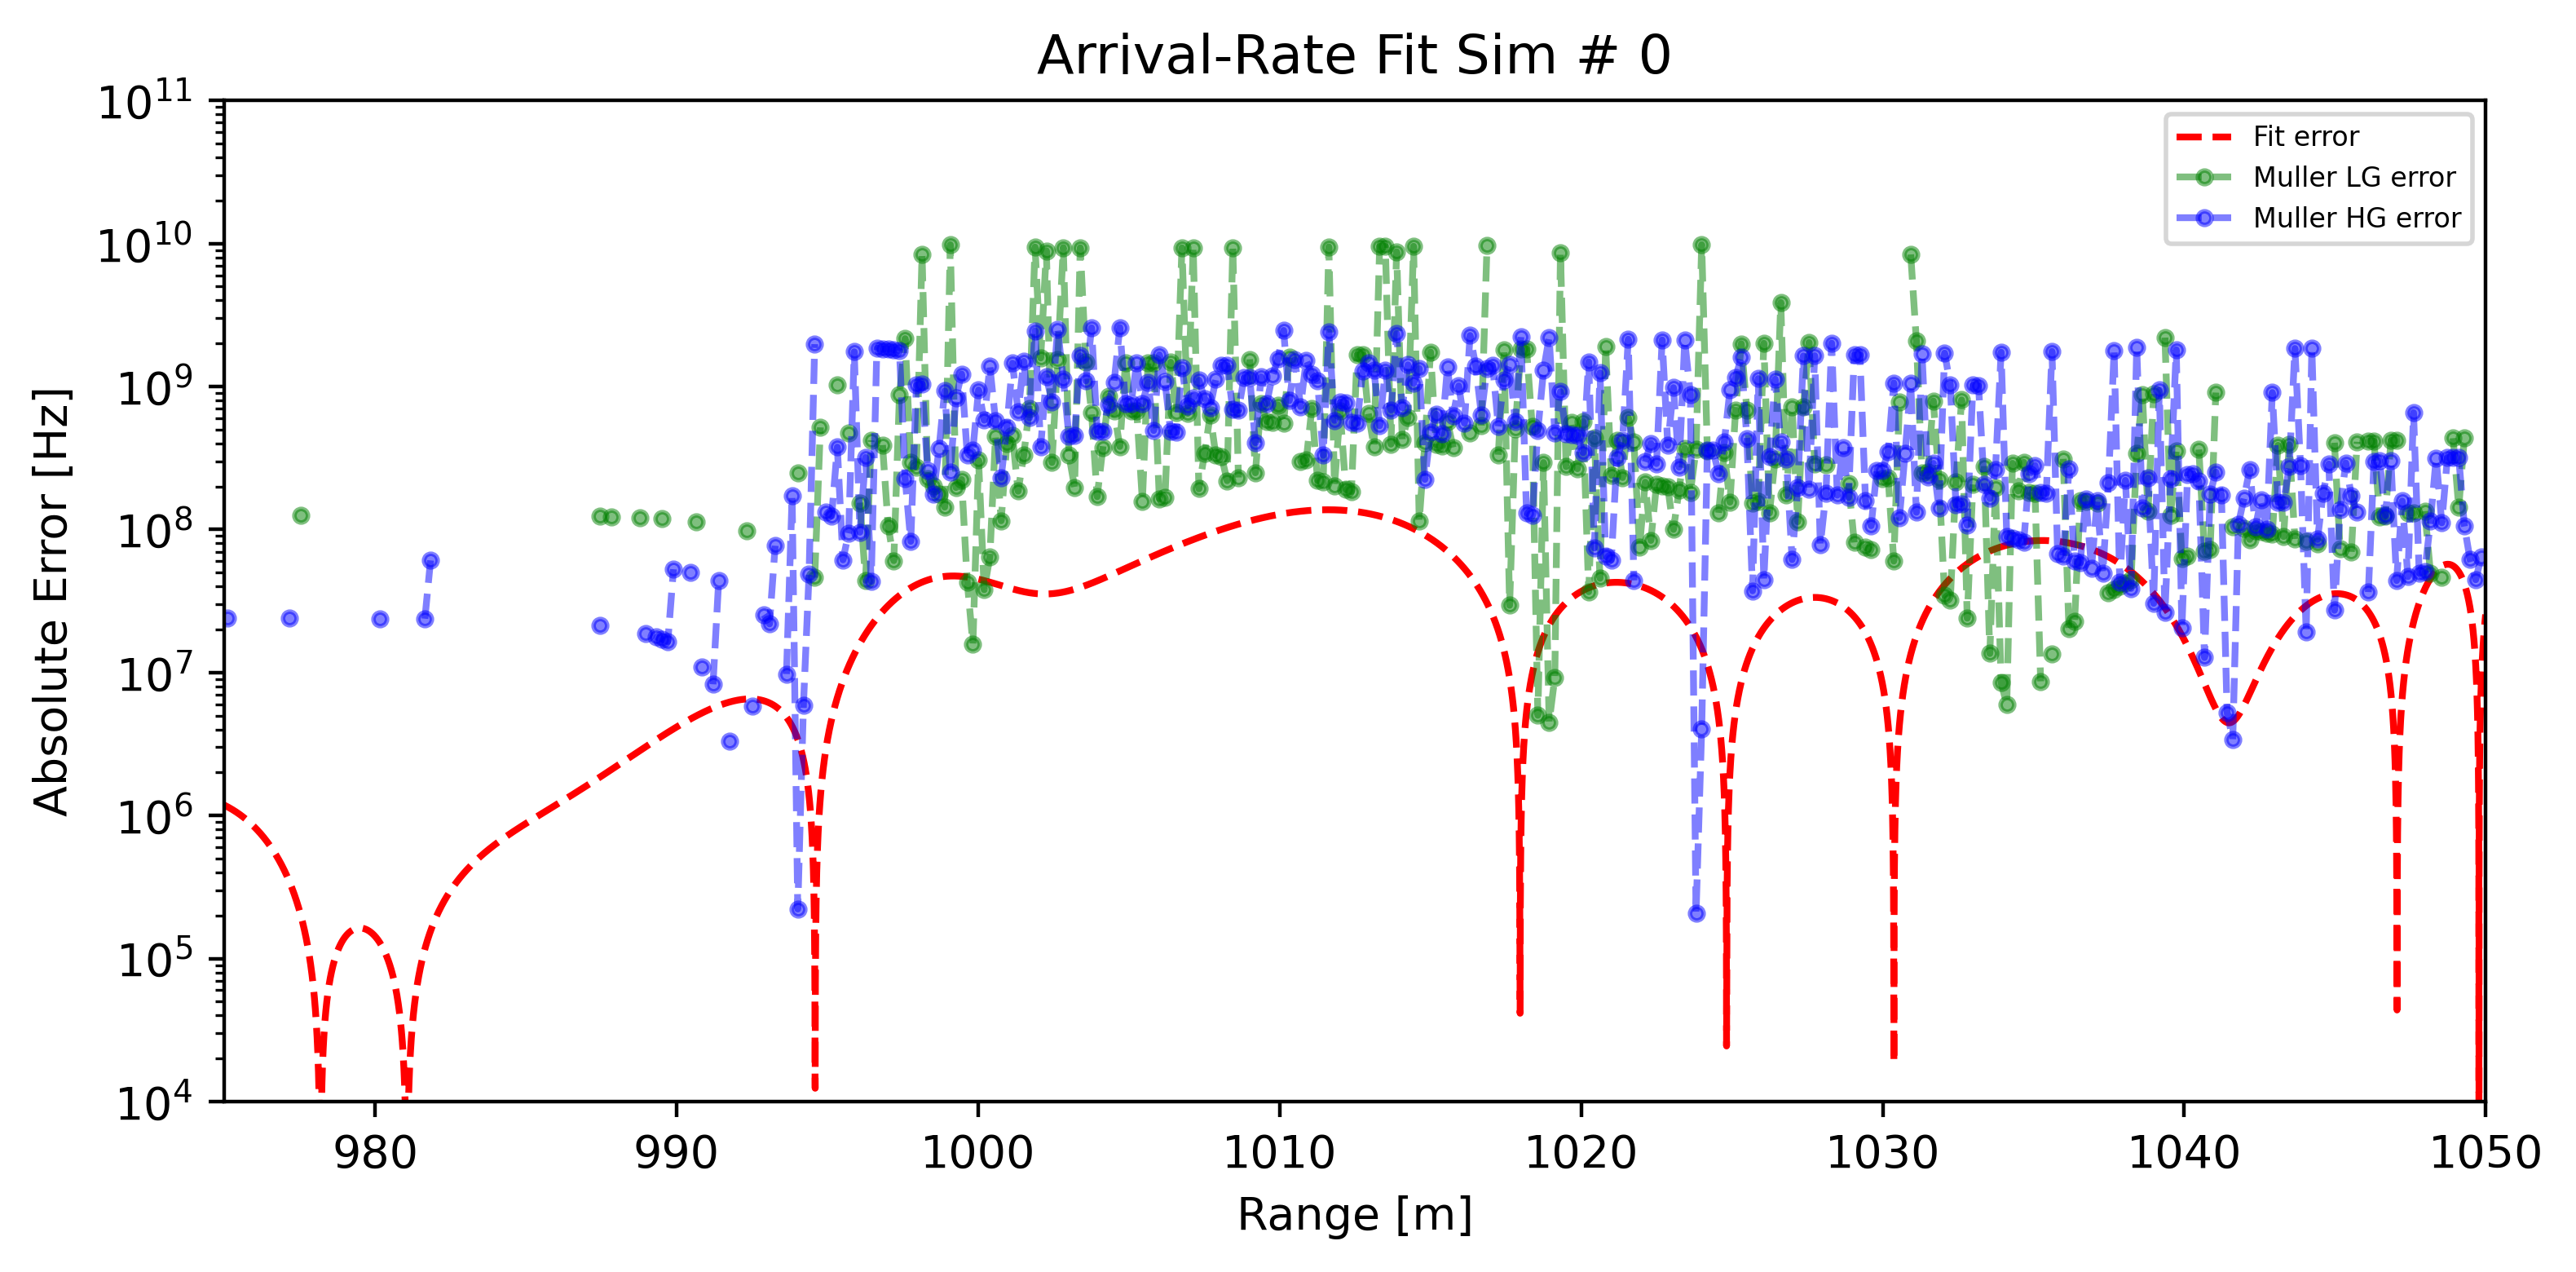

In [165]:
# Plot both Muller and DCT errors

fig = plt.figure(figsize=(8, 4), dpi=400)
ax = fig.add_subplot(111)
# ax.plot(t_fine_dct * c / 2, LG_error, color='orange', linestyle='--', label='Scaled LG error')
ax.plot(t_fine_dct * c / 2, np.abs(photon_rate_arr_dct - fit_rate_seg), color='r', linestyle='--', label='Fit error')
ax.plot(center_muller * c / 2, LG_error_muller, color='green', marker='.', linestyle='--', alpha=0.5, label='Muller LG error')
ax.plot(center_muller * c / 2, HG_error_muller, color='blue', marker='.', linestyle='--', alpha=0.5, label='Muller HG error')
ax.set_title('Arrival-Rate Fit Sim # {}'.format(sim_num))
ax.set_xlabel('Range [m]')
ax.set_ylabel('Absolute Error [Hz]')
ax.tick_params(axis='y', which='minor')
ax.semilogy()
ax.set_ylim([1e4, 1e11])
ax.set_xlim(xlim)
plt.legend(prop={'size': 6})
plt.tight_layout()

 ## C